# 0050 測試

<AxesSubplot:xlabel='date'>

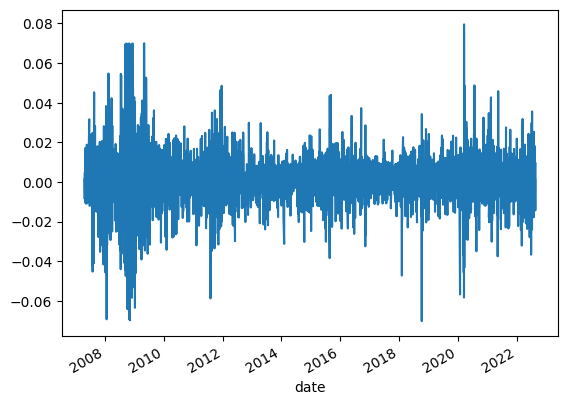

In [16]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 獲取0050收盤價資料
from finlab.data import Data
data = Data()
close = data.get_adj("收盤價")

# 將收盤假日期調整，這樣子等等使用pyfolio才不會有問題
close.index = close.index.tz_localize("Asia/Taipei")

# 每天報酬率繪圖
%matplotlib inline
close['0050'].pct_change().plot()

# 使用 Pyfolio 觀察個股報酬率

Start date,2007-04-23
End date,2022-08-25
Total months,180
,Backtest
Annual return,8.616%
Cumulative returns,246.276%
Annual volatility,19.979%
Sharpe ratio,0.51
Calmar ratio,0.15
Stability,0.86
Max drawdown,-55.753%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,55.75,2007-10-29,2008-11-20,2011-01-28,850
1,28.22,2020-01-14,2020-03-19,2020-07-13,130
2,26.82,2022-01-17,2022-07-06,NaT,NaN
3,23.01,2011-01-28,2011-12-19,2013-05-16,600
4,20.96,2015-04-27,2015-08-24,2016-08-08,336


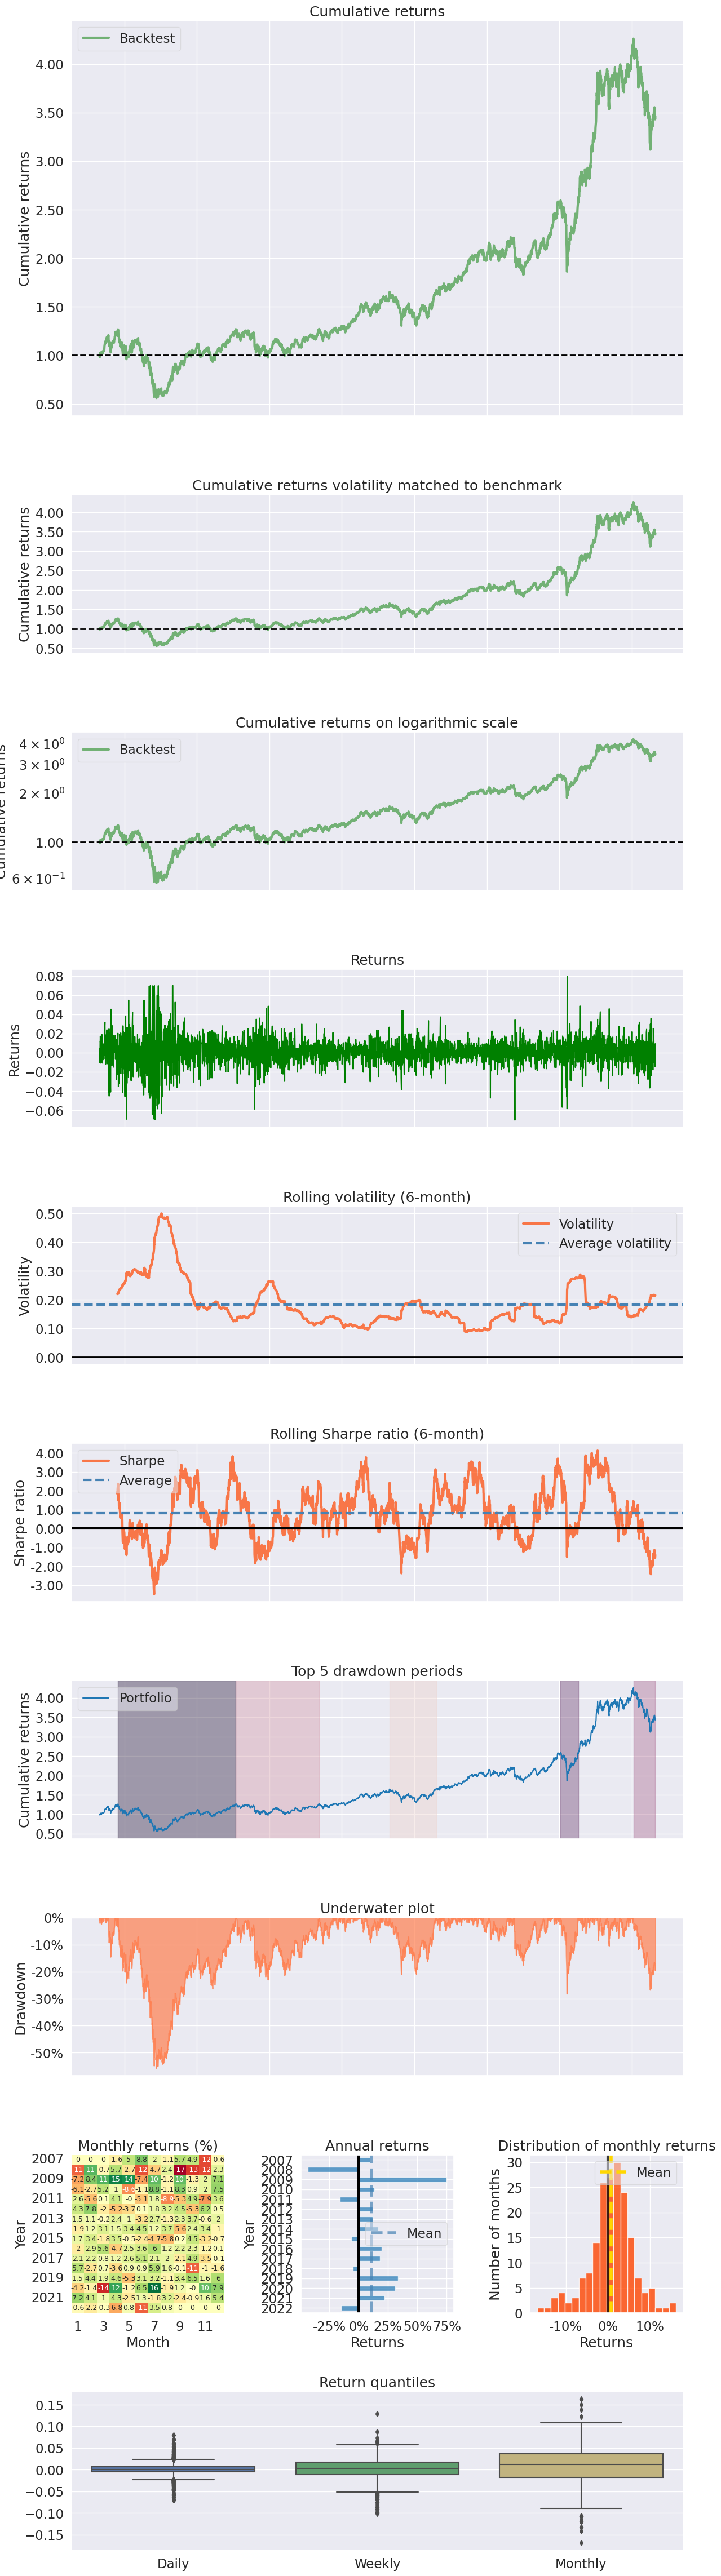

In [14]:
import pyfolio as pf

pf.create_returns_tear_sheet(close['0050'].pct_change())

Start date,2021-02-15
End date,2022-07-15
Total months,0
,Backtest
Annual return,162739.085%
Cumulative returns,69.594%
Annual volatility,94.04%
Sharpe ratio,8.40
Calmar ratio,23431.76
Stability,0.89
Max drawdown,-6.945%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,6.95,2021-03-15,2021-04-15,2021-05-15,45
1,4.06,2022-05-15,2022-06-15,2022-07-15,45
2,0.64,2021-10-15,2021-11-15,2021-12-15,44
3,0.39,2021-08-15,2021-09-15,2021-10-15,45
4,0.03,2022-02-15,2022-03-15,2022-04-15,44


KeyError: "[Timestamp('2021-02-15 00:00:00+0800', tz='Asia/Taipei'), Timestamp('2021-05-15 00:00:00+0800', tz='Asia/Taipei'), Timestamp('2021-08-15 00:00:00+0800', tz='Asia/Taipei'), Timestamp('2022-01-15 00:00:00+0800', tz='Asia/Taipei'), Timestamp('2022-05-15 00:00:00+0800', tz='Asia/Taipei')] not in index"

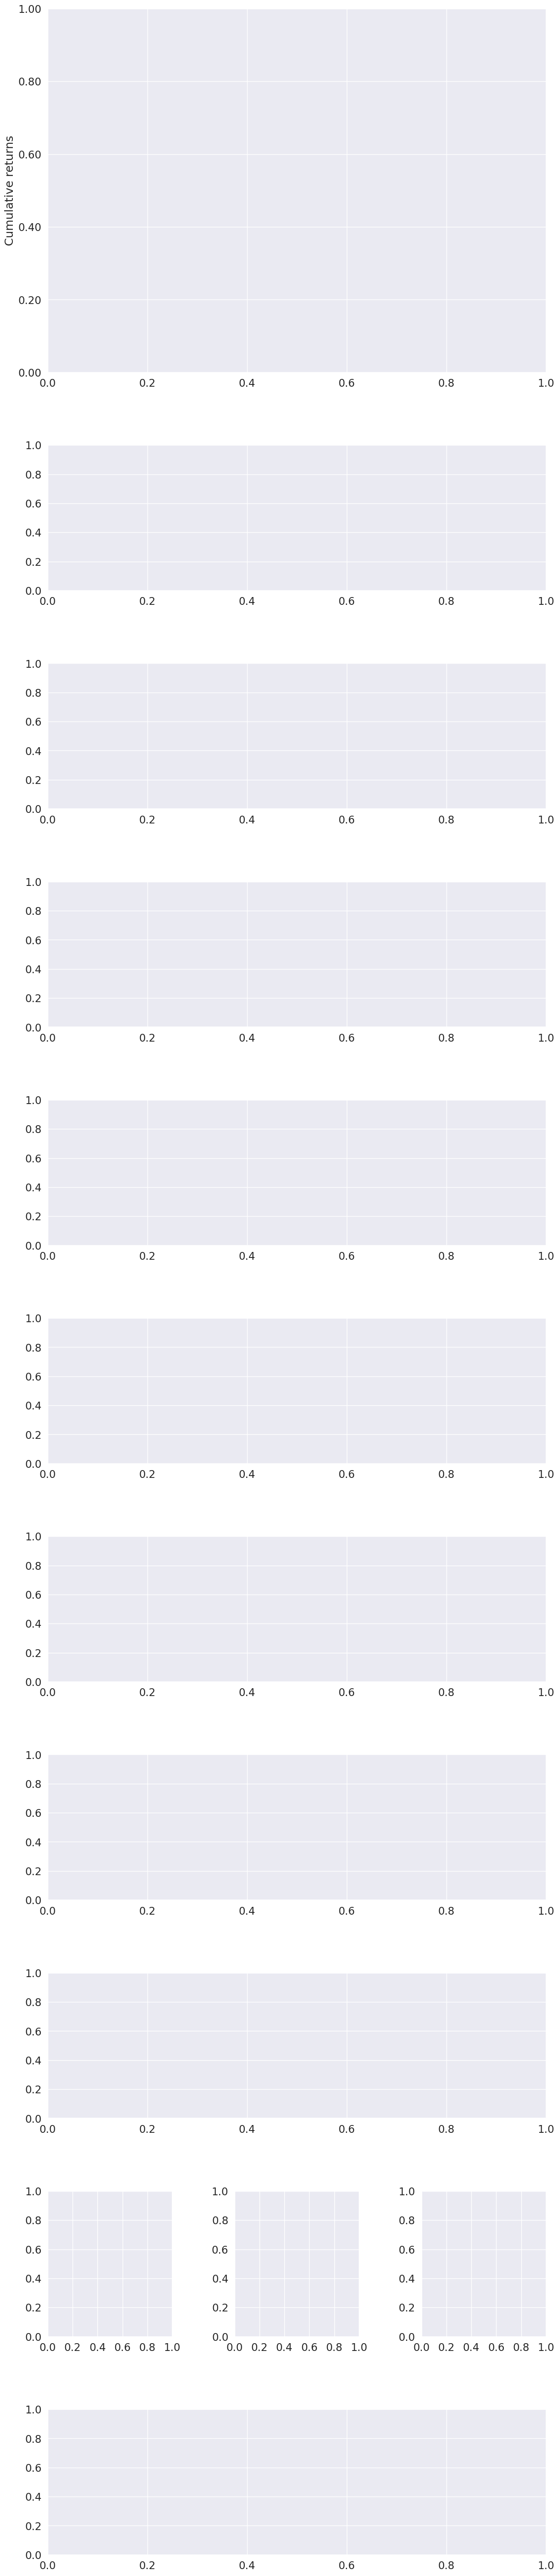

In [24]:
import pickle
import pandas as pd

# 得到 上一個單元的 回測結果
ret = pickle.load(open("return_history_1026.pkl", "rb"))

# 將回測報酬率取出來
ret = ret.pct_change().dropna()
ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')

# 利用pyfolio 比較報酬率
pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())